In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
from copy import deepcopy
from types import SimpleNamespace

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from run import utils

Auto-Sklearn cannot be imported.


In [3]:
# init config
config = SimpleNamespace()
config.prob = "tsp"
config.nodes = 20
config.feat = 10
config.net = []
config.optm = "adam"
config.batch = 32
config.l1 = 0.0
config.l2 = 0.0
config.lan = "gurobi"
config.proc = 32
config.path = "./res"

In [4]:
# polynomial degree
degs = [1, 2, 4, 6]

In [5]:
def getPath(config, mthd):
    config = deepcopy(config)
    if mthd == "spo":
        config.mthd = "spo"
        config.lr = 1e-2
        config.form = "dfj"
        config.rel = False
    if mthd == "spo-rel(gg)":
        config.mthd = "spo"
        config.lr = 1e-2
        config.form = "gg"
        config.rel = True
    if mthd == "spo-rel(mtz)":
        config.mthd = "spo"
        config.lr = 1e-2
        config.form = "mtz"
        config.rel = True
    path = utils.getSavePath(config)
    return path

In [6]:
def getDf(config, degs, mthd):
    dfs = pd.DataFrame()
    for deg in degs:
        config.deg = deg
        df = pd.read_csv(getPath(config, mthd))
        dfs[deg] = df["Unamb SPO"]
    return dfs

In [7]:
def drawPlot(config, data, noise):
    # set config
    config = deepcopy(config)
    config.data = data
    config.noise = noise
    # get df
    df_dfj  = getDf(config, degs, "spo")
    df_gg  = getDf(config, degs, "spo-rel(gg)")
    df_mtz = getDf(config, degs, "spo-rel(mtz)")
    # draw boxplot
    plt.figure(figsize=(12,9))
    plt.boxplot(df_dfj, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), 
                patch_artist=True, positions=np.arange(df_dfj.shape[1])-0.3, widths=0.18)
    plt.boxplot(df_gg, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), 
                patch_artist=True, positions=np.arange(df_dfj.shape[1])-0.1, widths=0.18)
    plt.boxplot(df_mtz, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), 
                patch_artist=True, positions=np.arange(df_dfj.shape[1])+0.1, widths=0.18)
    # vertical line
    plt.axvline(x=0.5, color="k", linestyle="--")
    plt.axvline(x=1.5, color="k", linestyle="--")
    plt.axvline(x=2.5, color="k", linestyle="--")
    # labels and ticks
    plt.xlabel('Deg', fontsize=24)
    plt.xticks(ticks=[0,1,2,3], labels=[1,2,4,6], fontsize=18)
    plt.ylabel('Normalized SPO Loss', fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlim(-0.5, 3.3)
    plt.ylim(-0.02, 0.38)
    plt.title('Training Set Size = {},\nNoise Half−width = {}'.format(config.data, config.noise), fontsize=18)
    plt.legend(['SPO+', 'SPO+Rel(GG)', "SPO+-Rel(MTZ)"], labelcolor=["g", "r", "c"], fontsize=16)
    plt.show()

## n = 1000, e = 0

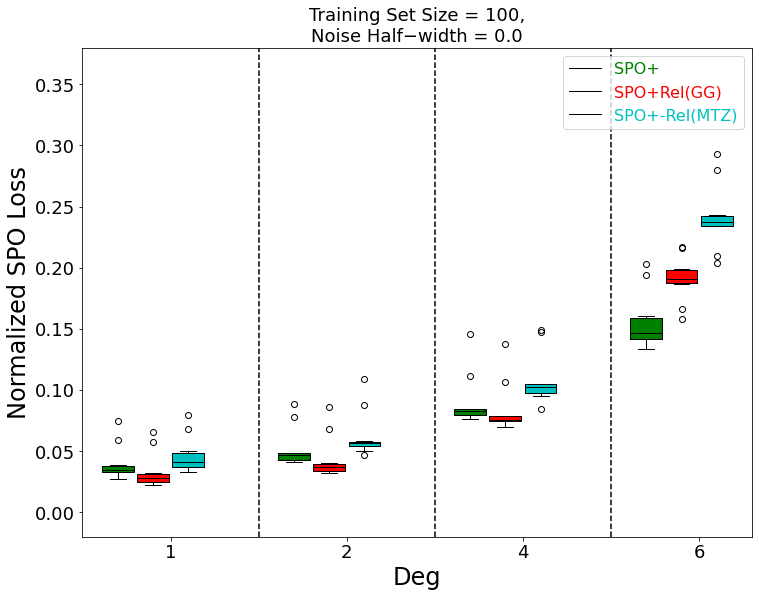

In [8]:
drawPlot(config, data=100, noise=0.0)

## n = 1000, e = 0

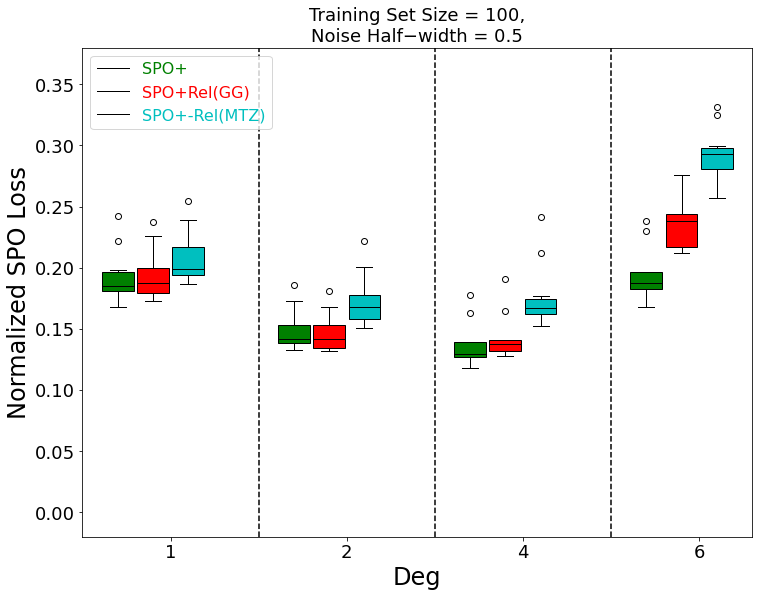

In [9]:
drawPlot(config, data=100, noise=0.5)

## n = 1000, e = 0

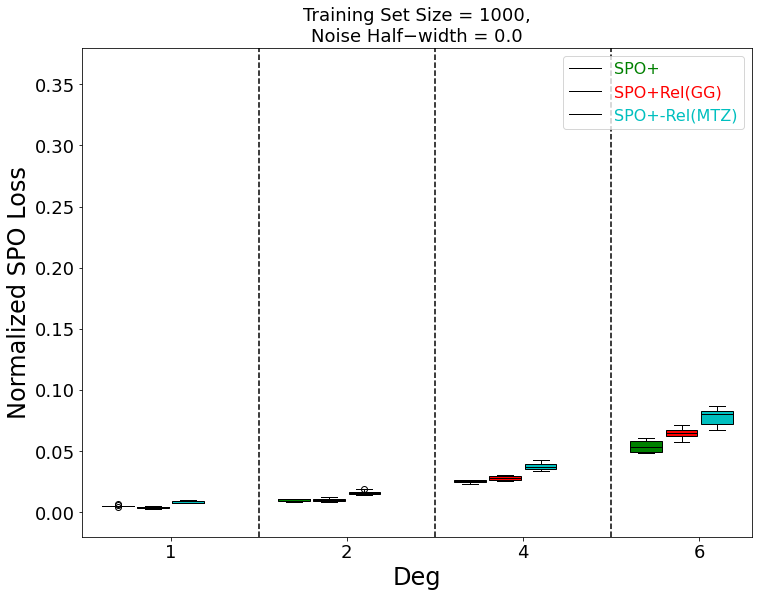

In [10]:
drawPlot(config, data=1000, noise=0.0)

## n = 1000, e = 0.5 

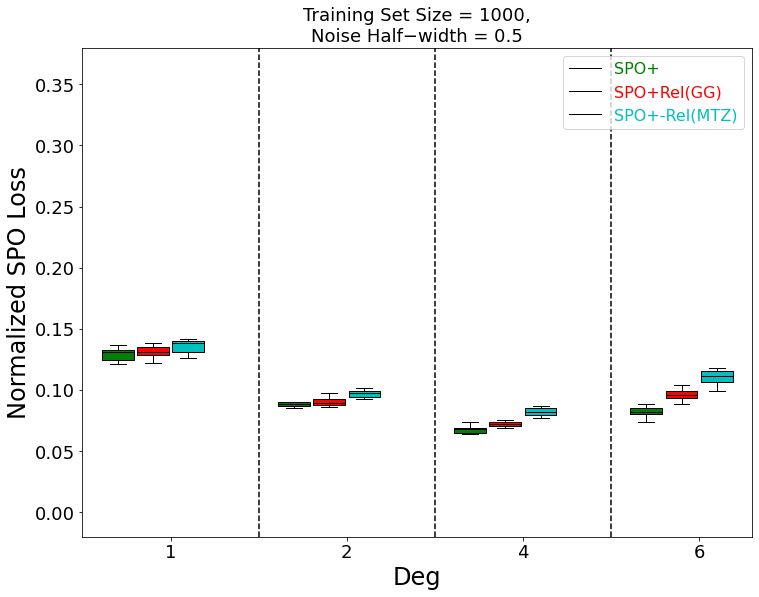

In [11]:
drawPlot(config, data=1000, noise=0.5)